# **Creating a Model for Credit Risk Prediction**

This is a Credit Risk Prediction case, which is a binary classification problem to predict the credit risk of a borrower. This will be done using several methods: Data Understanding, EDA, Data Preparation, Data Modelling, and Evaluation.

In [11]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access files

Mounted at /content/drive


In [12]:
!pip install dython # Install dython library for data analysis
import itertools       # For creating efficient loops and combinations
import joblib          # For saving and loading machine learning models
import os              # For interacting with the operating system (e.g., file paths)

import numpy as np     # For numerical operations and array handling
import pandas as pd    # For data manipulation and analysis
import matplotlib.pyplot as plt    # For creating visualizations and plots
import seaborn as sns; sns.set()   # For statistical data visualization and setting default style

from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model
from sklearn.model_selection import train_test_split # Importing function to split data into training and testing sets
from sklearn.pipeline import Pipeline # Importing Pipeline to chain multiple steps
from sklearn.compose import make_column_selector as selector # Importing selector for column transformation
from sklearn.compose import ColumnTransformer # Importing ColumnTransformer for applying different transformations to different columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Importing OneHotEncoder for categorical features and StandardScaler for numerical features
from sklearn.impute import SimpleImputer # Importing SimpleImputer for handling missing values
from sklearn.metrics import classification_report, confusion_matrix # Importing metrics for evaluating classification models
from dython.nominal import associations # Importing associations from dython for nominal data analysis

# ***Data Understanding***


In [13]:
data_path = "/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv"  # Define the file path to the dataset
data = pd.read_csv(data_path)  # Load the CSV file into a DataFrame called 'data'
display(data.head())  # Show the first five rows to preview the dataset
data.shape  # Output the dimensions of the dataset (rows, columns)

/tmp/ipython-input-3629889301.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)  # Load the CSV file into a DataFrame called 'data'


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(466285, 75)

In [14]:
data_path2 = "/content/drive/MyDrive/Dataset/LCDataDictionary.xlsx - LoanStats.csv"  # Define the file path to the data dictionary
data_dict = pd.read_csv(data_path2)  # Load the data dictionary CSV into a DataFrame
data_dict = data_dict[["Unnamed: 0", "Description"]]  # Select only the columns containing feature names and their descriptions
data_dict = data_dict.iloc[:78]  # Keep only the first 78 rows, assuming they correspond to relevant features
data_dict  # Display the resulting DataFrame containing feature names and descriptions

,Unnamed: 0,Description
0,_rec,The total amount committed by investors for th...
1,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
73,total_rec_prncp,Principal received to date
74,total_rev_hi_lim,Total revolving high credit/credit limit
75,url,URL for the LC page with listing data.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [15]:
data.describe() # Descriptive statistics for numerical columns

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [16]:
data.info() # Display general information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [17]:
def count_columns_by_dtype(df):  # Define a function to count columns by their data type
    dtype_count = df.dtypes.value_counts().to_dict()  # Count each data type and convert the result to a dictionary
    return dtype_count  # Return the dictionary of data type counts

dtype_count = count_columns_by_dtype(data)  # Call the function using the 'data' DataFrame and store the result
print(dtype_count)  # Print the number of columns for each data type


{dtype('float64'): 46, dtype('O'): 22, dtype('int64'): 7}


# ***Exploratory Data Analysis (EDA)***

In [18]:
title_font = dict(size=20, weight="bold")  # Define font style for plot titles

def plot_count(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_title(title, fontdict=title_font)

    # Buat palet warna unik untuk setiap kategori
    unique_categories = value_counts.index
    palette = sns.color_palette("tab10", len(unique_categories))  # Bisa diganti "husl", "Set2", dll
    color_map = dict(zip(unique_categories, palette))

    # Plot manual dengan warna per kategori
    for i, category in enumerate(unique_categories):
        count = value_counts[category]
        ax.barh(i, count, color=color_map[category])
        ax.text(count + 100, i, f"{percentage[category]}", va='center')

    ax.set_yticks(range(len(unique_categories)))
    ax.set_yticklabels(unique_categories)
    ax.set_ylabel("")

    plt.show()

def plot_distribution(df, x, title, **sns_kwargs):  # Plot distribution of a numerical variable
    plt.figure(figsize=(14, 10))  # Create figure with specified size
    plt.title(title, fontdict=title_font)  # Set plot title with custom font

    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)  # Plot histogram with KDE curve
    plt.ylabel("")  # Remove y-axis label
    plt.show()  # Display the plot

def plot_boxplot(df, x, y, title, **sns_kwargs):  # Plot boxplot to compare distributions across categories
    plt.figure(figsize=(14, 10))  # Create figure with specified size
    plt.title(title, fontdict=title_font)  # Set plot title with custom font

    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)  # Plot boxplot using seaborn
    plt.ylabel("")  # Remove y-axis label
    plt.show()  # Display the plot

# **Visualisasi Data**

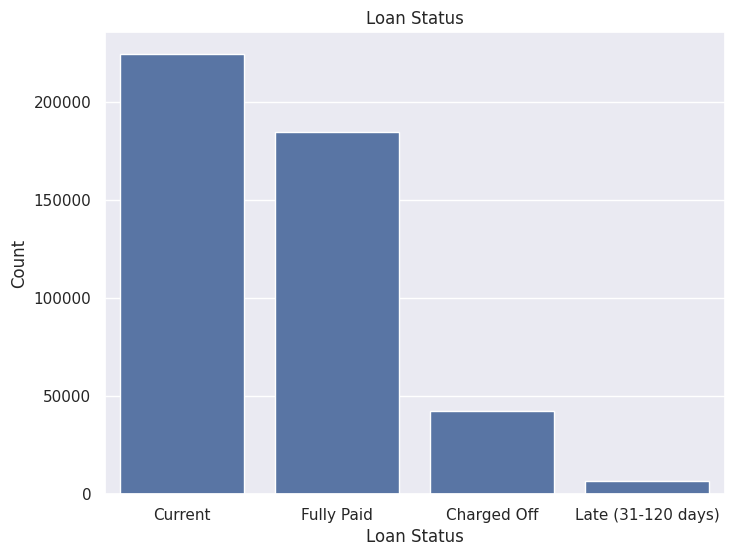

In [19]:
# Plot count for the variable "loan_status"
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(
    data=data,
    x="loan_status",  # Variable to plot on x-axis
    order=data["loan_status"].value_counts().index[:4]  # Order bars by top 4 most frequent values
)
plt.title("Loan Status")  # Set the title of the plot
plt.xlabel("Loan Status")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.show()  # Display the plot

Grafik di atas menunjukkan jumlah pinjaman berdasarkan kategori statusnya. Terdapat empat kategori utama yang ditampilkan, yaitu:
- Current (Sedang Berjalan)
Merupakan kategori dengan jumlah terbanyak, yaitu lebih dari 200.000 pinjaman. Ini menunjukkan bahwa sebagian besar peminjam masih aktif melakukan pembayaran sesuai jadwal.
- Fully Paid (Lunas)
Menempati posisi kedua terbanyak, dengan jumlah mendekati 200.000 pinjaman. Artinya, banyak peminjam telah berhasil melunasi pinjaman mereka secara penuh.
- Charged Off (Dihapuskan)
Jumlahnya jauh lebih rendah, sekitar 50.000 pinjaman. Status ini menunjukkan bahwa pinjaman dianggap tidak dapat ditagih lagi dan telah dihapuskan dari pembukuan.
- Late (31–120 days) / Terlambat (31–120 hari)
Merupakan kategori dengan jumlah paling sedikit, di bawah 10.000 pinjaman. Ini mencerminkan peminjam yang mengalami keterlambatan pembayaran dalam rentang waktu tersebut.


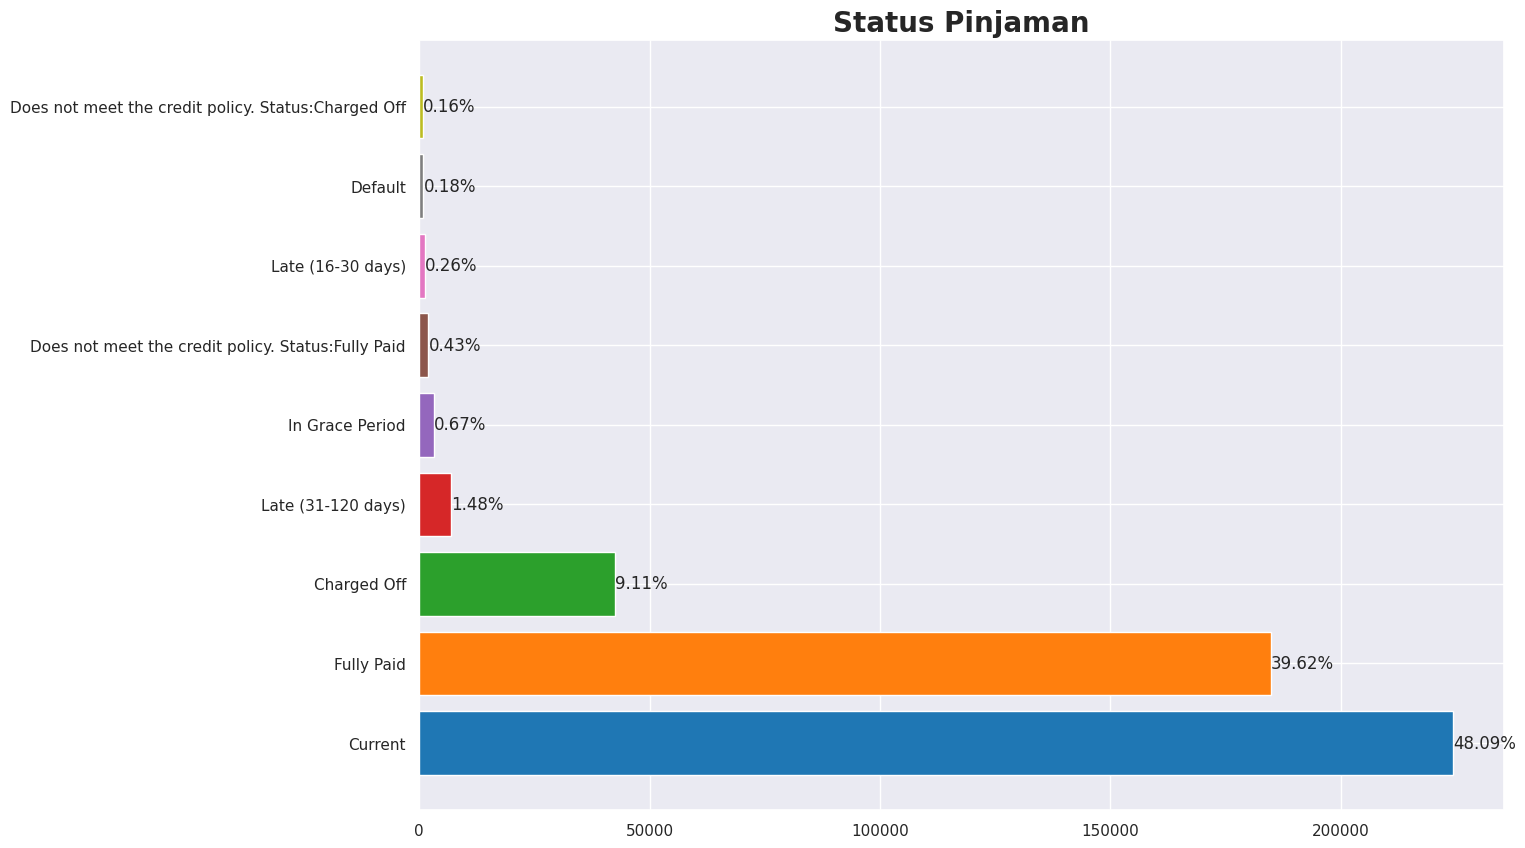

In [20]:
plot_count(data, title="Status Pinjaman",  y="loan_status") # Perform a plot count for the variable “loan_status” in the dataframe ‘data’ with the title “Loan Status”

Grafik di atas menampilkan persentase distribusi berbagai status pinjaman yang terdapat dalam data. Terdapat sembilan kategori utama, masing-masing menunjukkan proporsi pinjaman terhadap total keseluruhan. Berikut penjelasannya:
- Current (Sedang Berjalan) – 48.09%
Merupakan kategori terbesar, menunjukkan bahwa hampir separuh dari seluruh pinjaman masih aktif dan sedang dalam proses pembayaran.
- Fully Paid (Lunas) – 39.62%
Menempati posisi kedua terbanyak. Ini menunjukkan bahwa sebagian besar peminjam telah berhasil melunasi pinjaman mereka secara penuh.
- Charged Off (Dihapuskan) – 9.11%
Menunjukkan bahwa sekitar 9% pinjaman telah dianggap tidak dapat ditagih dan dihapuskan dari pembukuan. Ini merupakan indikator risiko gagal bayar.
- Late (31–120 days) – 1.48%
Menandakan keterlambatan pembayaran yang cukup serius, yaitu lebih dari satu bulan. Meskipun jumlahnya kecil, kategori ini penting untuk pemantauan risiko.
- In Grace Period – 0.43%
Menunjukkan pinjaman yang sedang dalam masa tenggang setelah jatuh tempo, namun belum secara resmi dianggap terlambat.
- Does not meet the credit policy: Status:Fully Paid – 0.34%
Pinjaman yang telah dilunasi tetapi sebelumnya tidak memenuhi kebijakan kredit internal.
- Late (16–30 days) – 0.26%
Menunjukkan keterlambatan pembayaran dalam jangka waktu pendek, namun tetap perlu diperhatikan sebagai potensi risiko.
- Default – 0.18%
Menandakan pinjaman yang secara resmi telah gagal bayar.
- Does not meet the credit policy: Status:Charged Off – 0.16%
Pinjaman yang dihapuskan dan sebelumnya tidak memenuhi kebijakan kredit.


In [21]:
approved_cat = ["Fully Paid"]  # Define the category for approved loans

dissaproved_cat = [  # Define categories for disapproved or risky loans
    "Charged Off",  # Loan was written off due to non-payment
    "Default",  # Loan defaulted by the borrower
    "Does not meet the credit policy. Status:Fully Paid",  # Loan paid but did not meet internal credit criteria
    "Does not meet the credit policy. Status:Charged Off"  # Loan charged off and did not meet credit criteria
]

In [22]:
def label_loan_status(value):  # Define a function to assign binary labels to loan status
    if value in approved_cat:  # If the loan status is in the approved category
        return 1  # Label as 1 (approved)
    return 0  # Otherwise, label as 0 (disapproved)

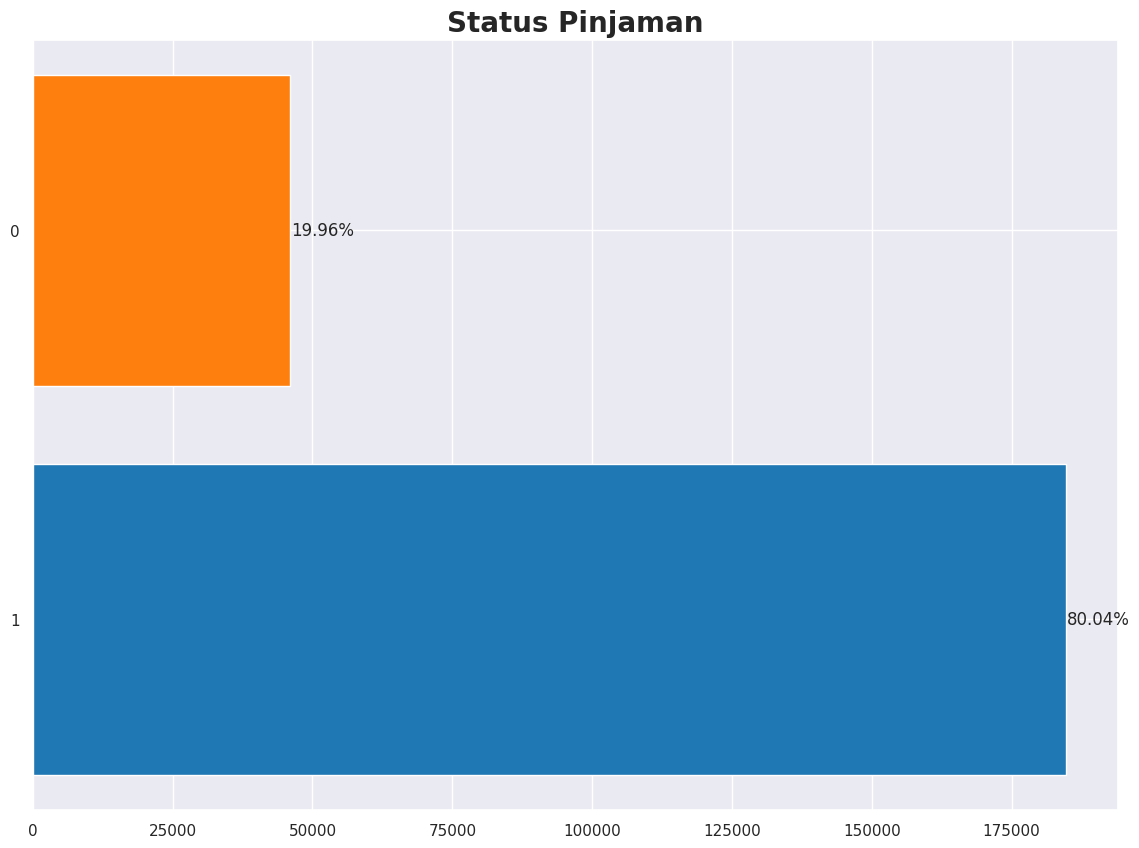

In [23]:
inter_df = data[data["loan_status"].isin(approved_cat + dissaproved_cat)].copy()  # Filter rows with loan_status in approved or disapproved categories and create a copy
inter_df["loan_status"] = inter_df["loan_status"].apply(label_loan_status)  # Apply the labeling function to convert loan_status into binary format (1 = approved, 0 = disapproved)

plot_count(inter_df, y="loan_status", title="Status Pinjaman")  # Display a count plot showing the distribution of loan approval status (1 = approved, 0 = disapproved)

Grafik di atas menampilkan distribusi status pinjaman yang telah dikonversi ke dalam format biner, yaitu:
- Kategori 1 (Disetujui) – 80.04%
Menunjukkan bahwa mayoritas pinjaman dalam data berada dalam kategori yang dianggap berhasil atau disetujui. Ini mencakup pinjaman yang telah dilunasi secara penuh dan memenuhi kriteria kelayakan kredit.
- Kategori 0 (Tidak Disetujui) – 19.96%
Mewakili pinjaman yang gagal atau berisiko tinggi, seperti yang mengalami gagal bayar, keterlambatan signifikan, atau tidak memenuhi kebijakan kredit.

Distribusi ini memberikan gambaran umum bahwa sebagian besar peminjam dalam dataset memiliki performa pembayaran yang baik. Namun, hampir 20% pinjaman berada dalam kategori yang berpotensi merugikan, sehingga tetap perlu dilakukan analisis risiko lebih lanjut.


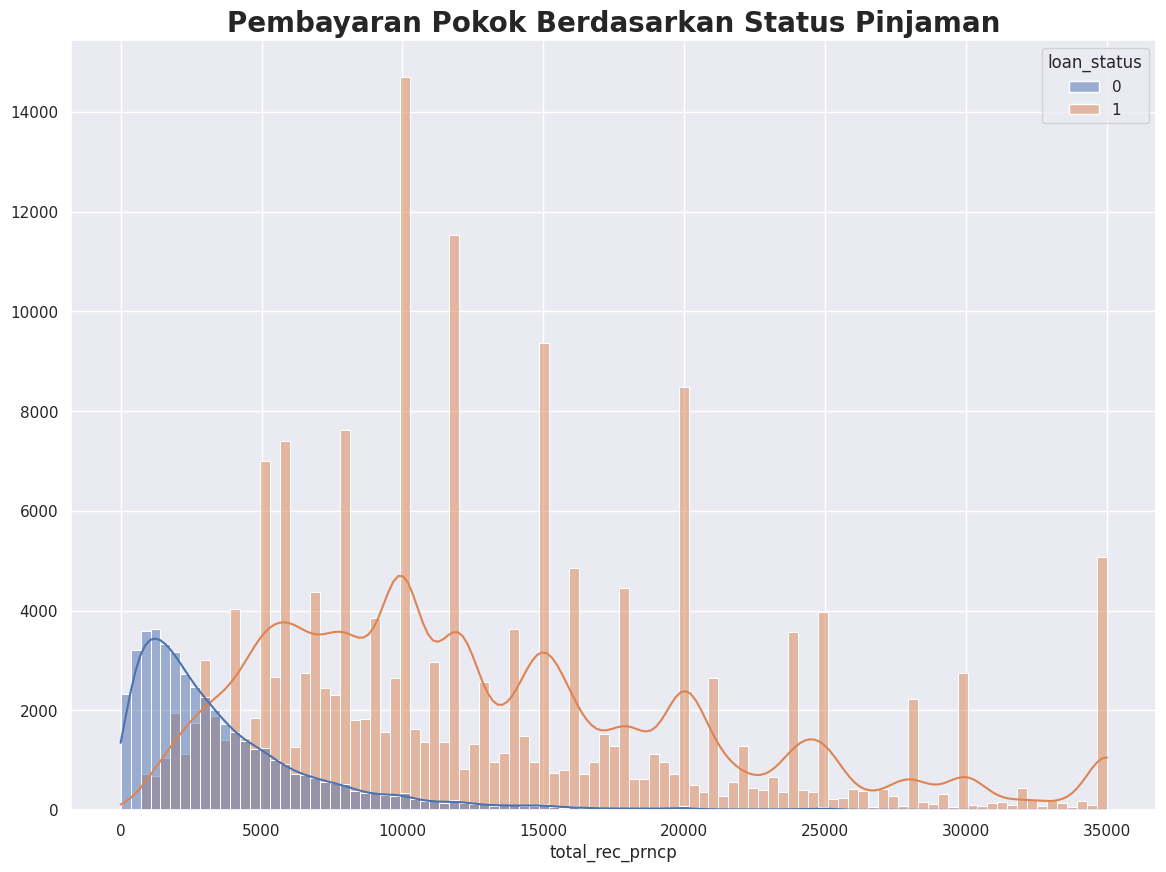

In [24]:
plot_distribution(  # Call the custom function to plot the distribution of a numeric variable
    df=inter_df,  # Use the filtered DataFrame with binary loan_status
    x="total_rec_prncp",  # Set the variable to plot: total principal received
    hue="loan_status",  # Color the distribution by loan status (approved vs disapproved)
    title="Pembayaran Pokok Berdasarkan Status Pinjaman"  # Set the plot title
)

Grafik di atas ini menampilkan distribusi jumlah pokok pinjaman yang telah dibayarkan (total_rec_prncp), dibandingkan berdasarkan dua kategori status pinjaman:
- Kategori 1 (Disetujui)
Diwakili oleh garis dan batang berwarna biru, kategori ini menunjukkan peminjam yang berhasil melunasi pinjaman mereka. Distribusi pembayaran pokok pada kelompok ini cenderung lebih tinggi dan merata, menandakan bahwa peminjam dalam kategori ini telah membayar sebagian besar atau seluruh pokok pinjaman.
- Kategori 0 (Tidak Disetujui)
Diwakili oleh warna oranye, kategori ini mencakup peminjam yang mengalami gagal bayar, keterlambatan signifikan, atau tidak memenuhi kebijakan kredit. Distribusinya lebih rendah dan cenderung terkonsentrasi pada nilai pokok yang kecil, menunjukkan bahwa sebagian besar dari mereka tidak membayar pokok secara penuh.

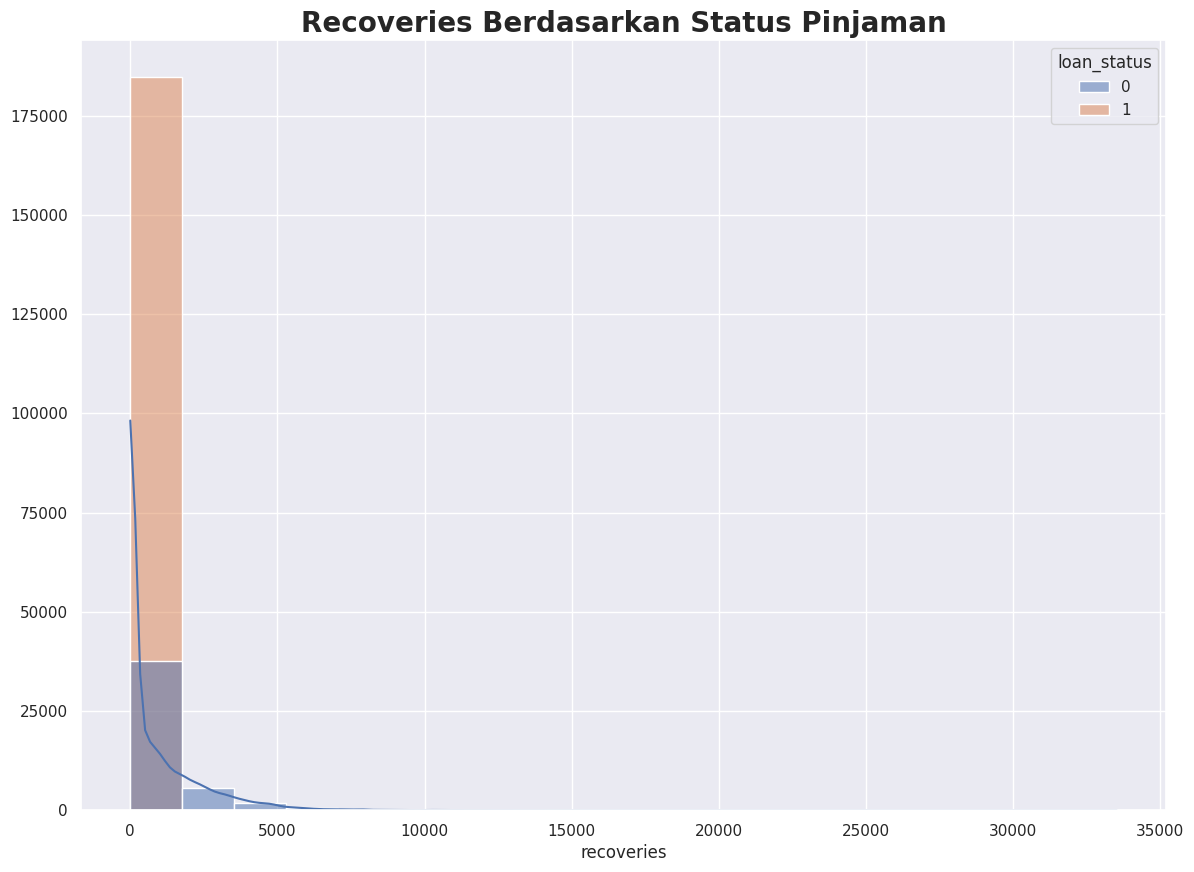

In [25]:
plot_distribution(  # Call the custom function to plot the distribution of a numeric variable
    df=inter_df,  # Use the filtered DataFrame with binary loan_status
    x="recoveries",  # Set the variable to plot: total amount recovered after charge-off
    hue="loan_status",  # Color the distribution by loan status (approved vs disapproved)
    title="Recoveries Berdasarkan Status Pinjaman"  # Set the plot title
)

Grafik di atas ini menunjukkan distribusi jumlah dana yang berhasil dipulihkan (recoveries) dari pinjaman, dibedakan berdasarkan dua kategori status:
- Status 0 (Tidak Disetujui)
Diwakili oleh batang berwarna coklat muda, kategori ini mencakup pinjaman yang gagal bayar atau tidak memenuhi kebijakan kredit. Grafik menunjukkan bahwa pemulihan dana pada kelompok ini lebih sering terjadi, meskipun jumlahnya cenderung kecil. Ini mengindikasikan bahwa sebagian dana masih bisa ditagih meskipun pinjaman tidak berhasil.
- Status 1 (Disetujui)
Diwakili oleh batang berwarna biru tua, kategori ini mencakup pinjaman yang telah dilunasi. Frekuensi pemulihan dana pada kelompok ini jauh lebih rendah, karena sebagian besar dana sudah dibayar sesuai jadwal dan tidak perlu proses penagihan tambahan.


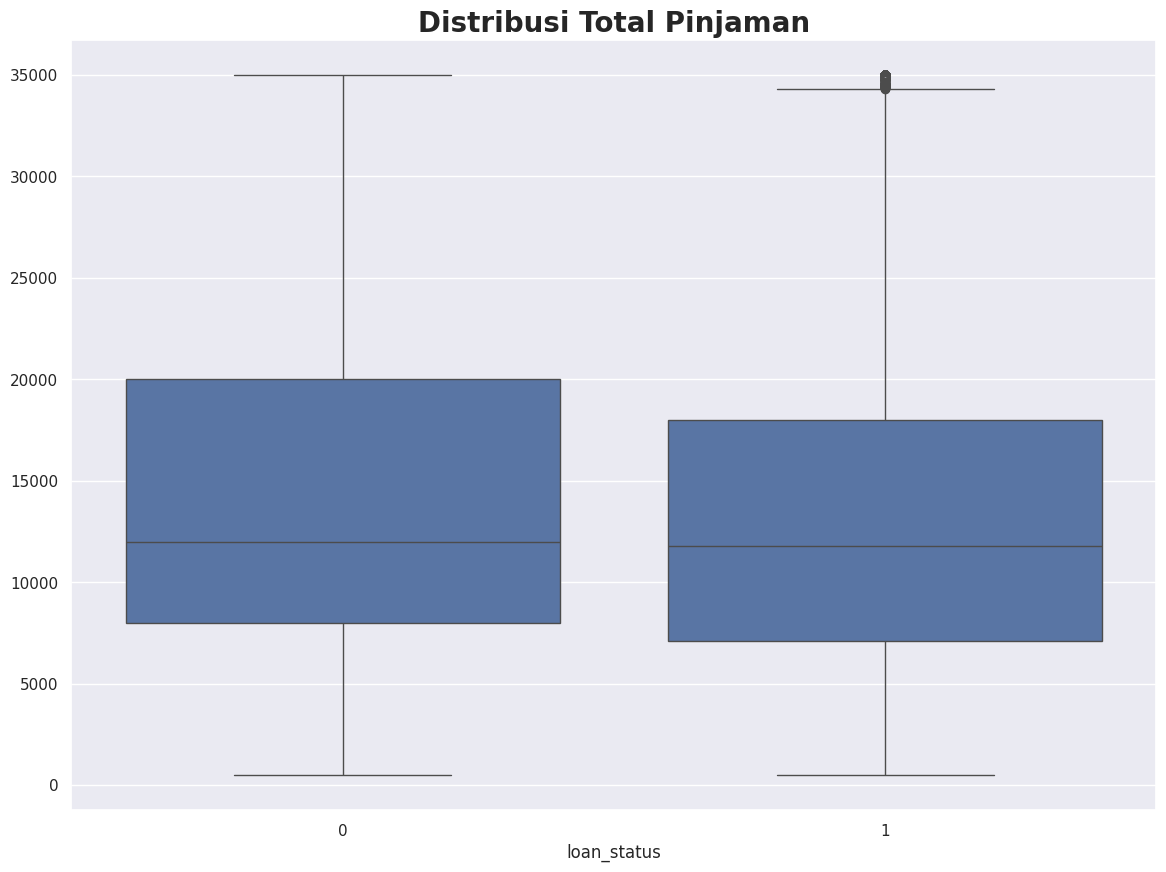

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,14205.570393,8362.468087,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [26]:
x, y = "loan_status", "loan_amnt"  # Define the x-axis and y-axis variables for plotting and analysis

plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pinjaman")  # Create a boxplot showing loan amount distribution by loan status

inter_df.groupby(x)[y].describe()  # Generate descriptive statistics of loan amount grouped by loan status (approved vs disapproved)

Grafik di atas ini menunjukkan bahwa distribusi jumlah pinjaman relatif serupa antara kedua status, meskipun peminjam dengan status tidak disetujui cenderung mengajukan nilai yang sedikit lebih besar. Rentang yang luas dan keberadaan outlier di kedua kategori mengindikasikan bahwa besaran pinjaman tidak selalu menjadi penentu keberhasilan persetujuan.


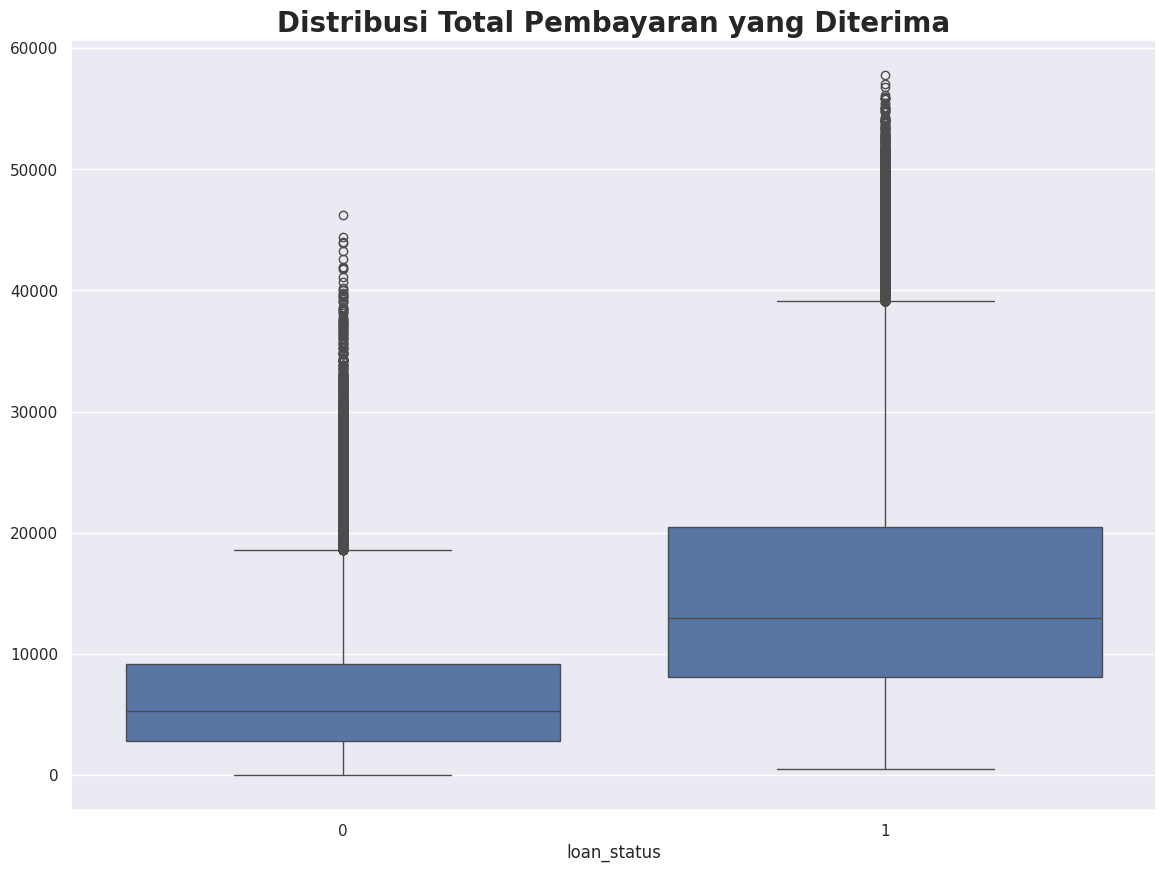

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,6814.461231,5610.294962,0.00,2829.912500,5260.94000,9120.685,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [27]:
x, y = "loan_status", "total_pymnt"  # Define the x-axis and y-axis variables for plotting and analysis

plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pembayaran yang Diterima")  # Create a boxplot showing total payment distribution by loan status

inter_df.groupby(x)[y].describe()  # Generate descriptive statistics of total payments grouped by loan status (approved vs disapproved)

Grafik di atas ini menunjukkan bahwa distribusi total pembayaran cenderung lebih tinggi pada kelompok pinjaman dengan status yang baik. Nilai median dan sebaran yang lebih luas mengindikasikan bahwa peminjam dalam kategori ini memberikan kontribusi pembayaran yang lebih signifikan dibandingkan kategori status yang buruk.


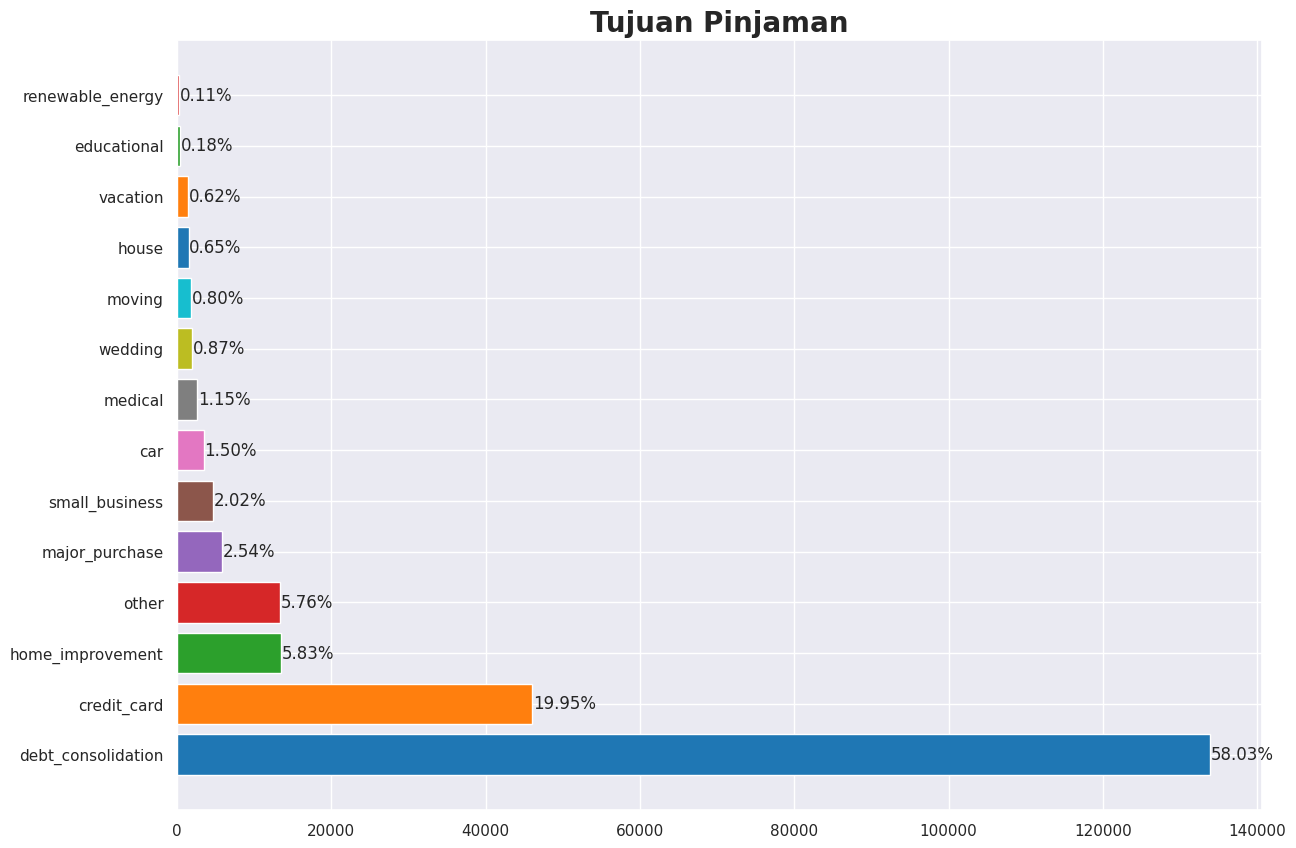

In [28]:
plot_count(inter_df, y="purpose", title="Tujuan Pinjaman")

Grafik di atas ini menampilkan distribusi tujuan peminjaman berdasarkan persentase dan jumlah peminjam untuk setiap kategori. Terlihat bahwa:
- Tujuan paling dominan adalah konsolidasi utang (debt_consolidation), mencakup lebih dari setengah total pinjaman (58.03%). Ini menunjukkan bahwa banyak peminjam menggunakan layanan pinjaman untuk menyatukan utang-utang mereka agar lebih mudah dikelola.
- Tujuan kedua terbanyak adalah pembayaran kartu kredit (credit_card) sebesar 19.95%, diikuti oleh renovasi rumah (home_improvement) dan kategori lain seperti pembelian besar, usaha kecil, dan kebutuhan medis.
- Kategori dengan frekuensi paling rendah termasuk energi terbarukan, pendidikan, dan liburan, yang masing-masing berada di bawah 1%.

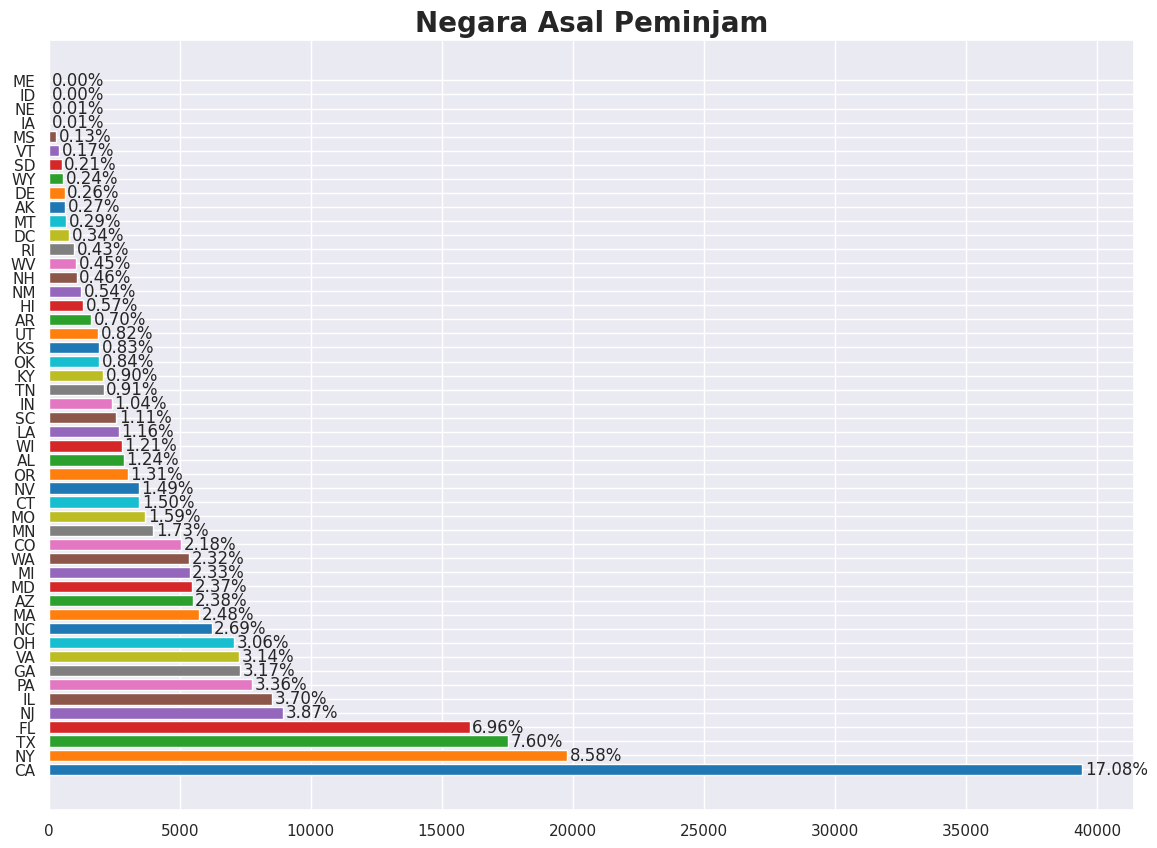

In [29]:
plot_count(  # Call the custom function to plot the count distribution of a categorical variable
    df=inter_df,  # Use the filtered DataFrame with binary loan_status
    y="addr_state",  # Set the variable to plot: borrower's state of residence
    title="Negara Asal Peminjam"  # Set the plot title to 'Borrower's State of Origin'
)

Grafik di atas ini menunjukkan distribusi peminjam berdasarkan negara bagian asal mereka di Amerika Serikat. Terlihat bahwa:
- California (CA) merupakan negara bagian dengan jumlah peminjam terbanyak, mencakup 17.08% dari total data.
- Diikuti oleh Texas (8.58%), New York (7.60%), dan Florida (6.96%), yang juga memiliki kontribusi signifikan terhadap total peminjam.
- Sebagian besar negara bagian lainnya memiliki persentase yang jauh lebih kecil, bahkan beberapa hampir tidak tercatat.

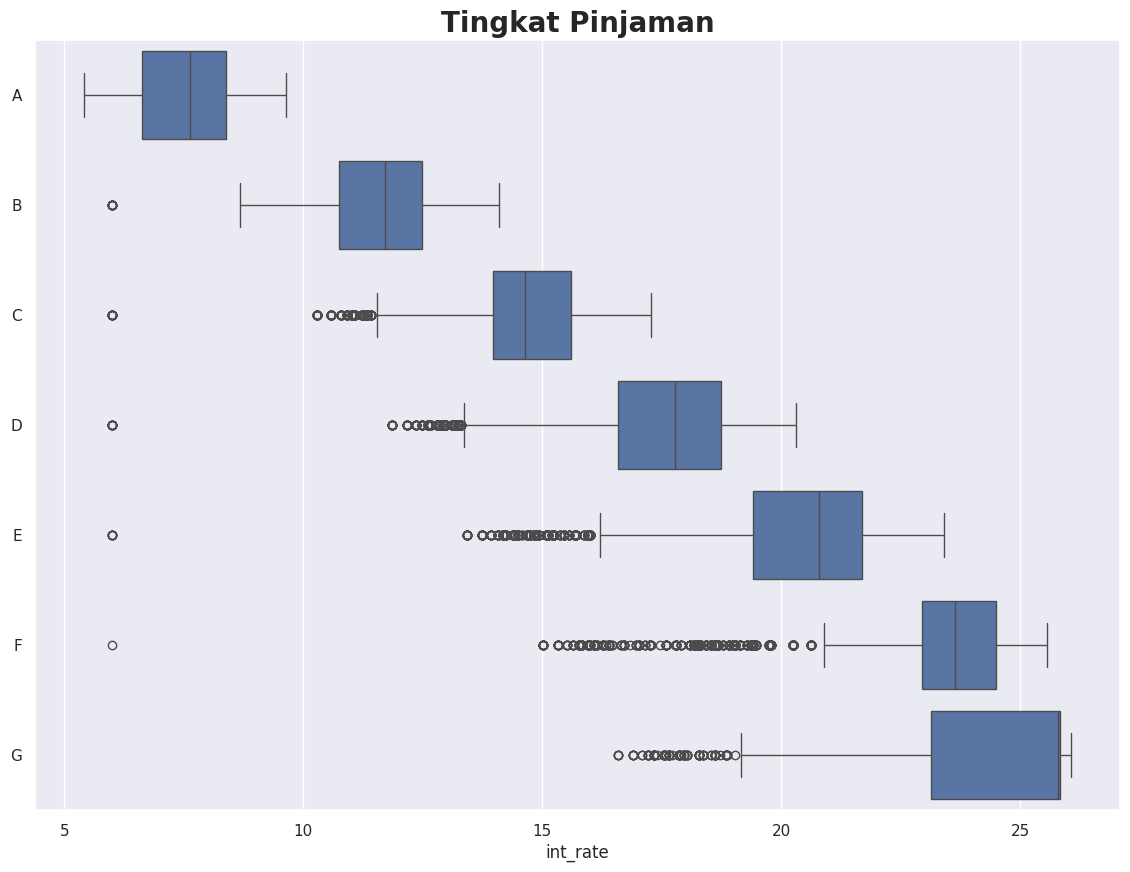

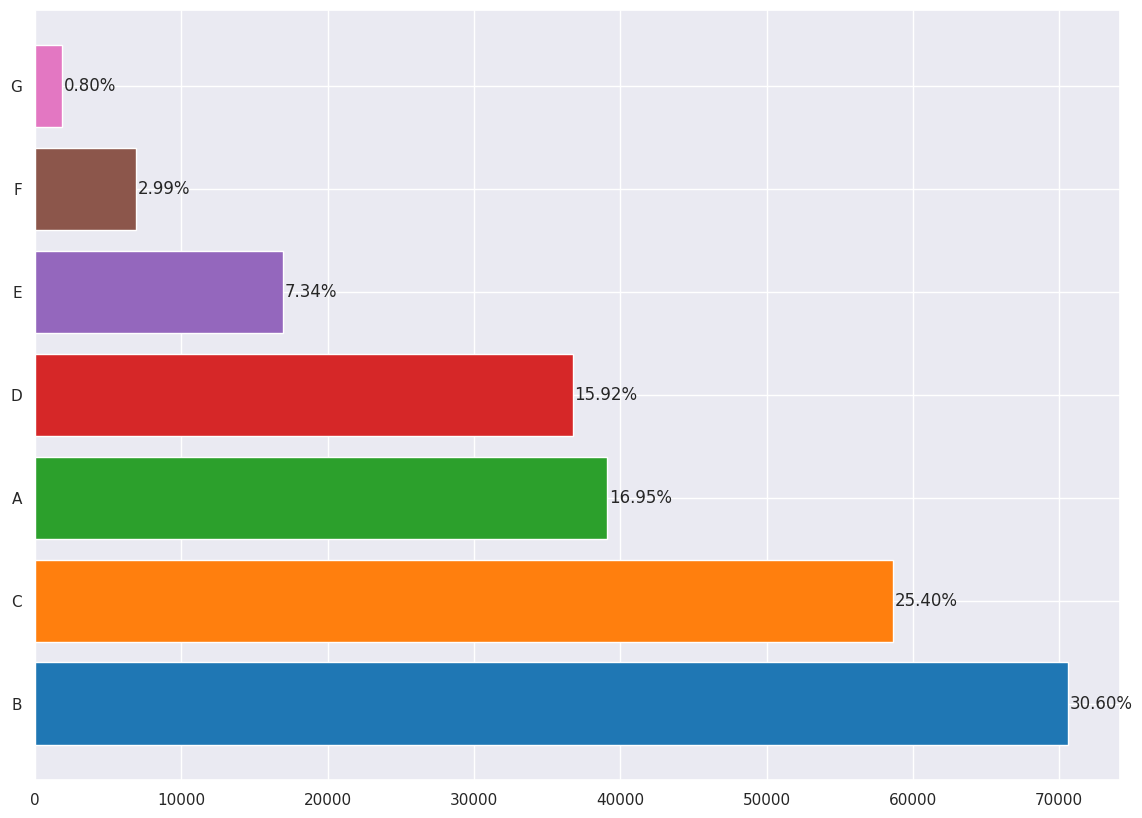

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39110.0,7.545742,1.003571,5.42,6.62,7.62,8.39,9.63
B,70622.0,11.654616,1.281087,6.00,10.74,11.71,12.49,14.09
C,58626.0,14.767515,1.233598,6.00,13.98,14.64,15.61,17.27
D,36740.0,17.628885,1.484771,6.00,16.59,17.77,18.75,20.31
E,16945.0,20.341001,1.920465,6.00,19.42,20.80,21.70,23.40
F,6896.0,23.137195,2.097052,6.00,22.95,23.63,24.50,25.57
G,1856.0,24.191482,2.509841,16.59,23.13,25.80,25.83,26.06


In [30]:
x, y = "int_rate", "grade"  # Define the x-axis and y-axis variables for plotting and analysis
order = inter_df[y].sort_values().unique()  # Sort the grade categories to maintain consistent order in the plot
plot_boxplot(inter_df, x=x, y=y, title="Tingkat Pinjaman", order=order)  # Create a boxplot showing interest rate distribution across loan grades
plot_count(df=inter_df, y=y, title="")  # Display a count plot showing the frequency of each loan grade
inter_df.groupby(y)[x].describe()  # Generate descriptive statistics of interest rate grouped by loan grade

Grafik di atas ini menunjukkan distribusi tingkat bunga (interest rate) berdasarkan kategori pinjaman dari A hingga G. Terlihat bahwa:
- Semakin rendah kategori (misalnya A atau B), tingkat bunga cenderung lebih rendah dan distribusinya lebih sempit.
- Sebaliknya, kategori yang lebih tinggi (seperti F dan G) memiliki tingkat bunga yang lebih tinggi dan sebaran yang lebih lebar, menunjukkan risiko yang lebih besar.

Grafik setelahnya menunjukkan proporsi peminjam berdasarkan kategori pinjaman dari A hingga G. Terlihat bahwa:
- Kategori B dan C mendominasi distribusi, masing-masing mencakup 30.60% dan 25.40% dari total peminjam.
- Kategori A dan D juga cukup signifikan, dengan persentase di atas 15%.
- Kategori E, F, dan G memiliki proporsi yang jauh lebih kecil, menunjukkan bahwa hanya sebagian kecil peminjam berada dalam kelompok risiko tinggi.


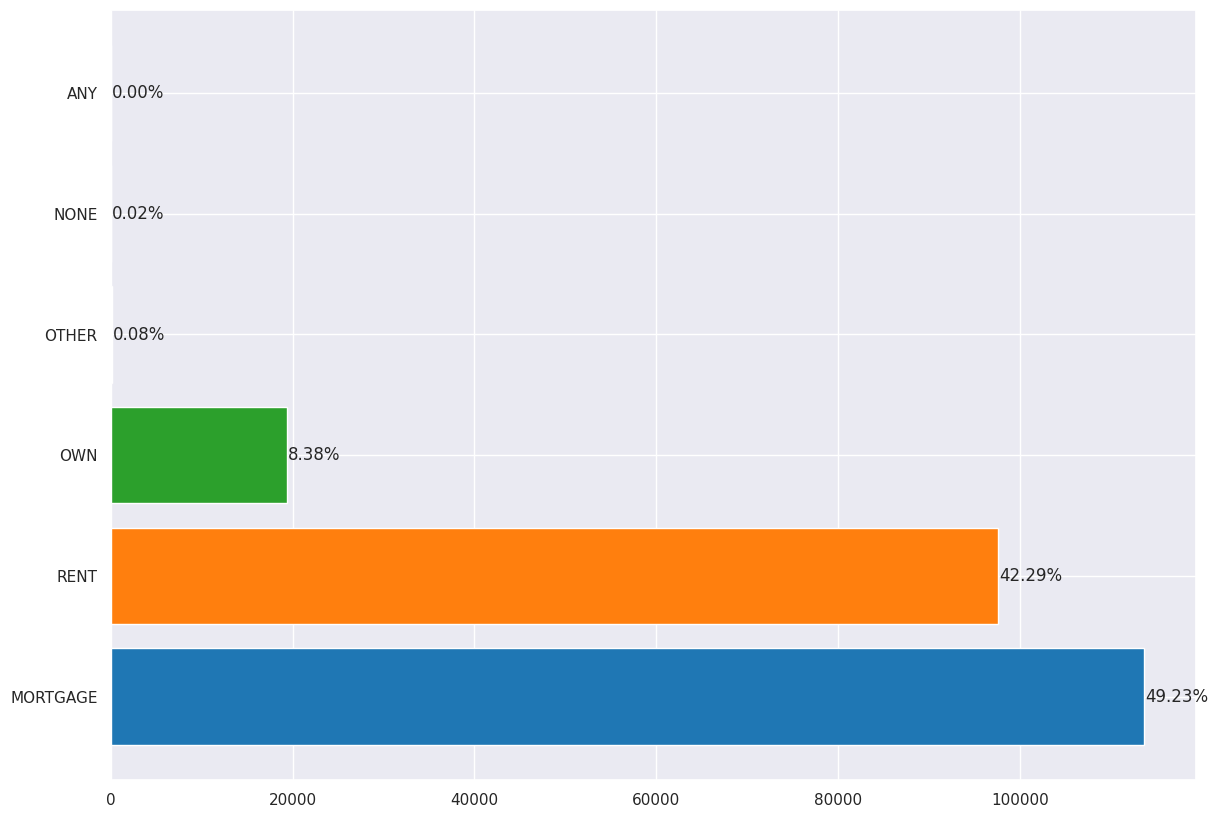

In [31]:
y = "home_ownership"  # Define the categorical variable to analyze: home ownership status
order = inter_df[y].sort_values().unique()  # Sort the unique home ownership categories for consistent plotting
plot_count(df=inter_df, y=y, title="")  # Display a count plot showing the distribution of home ownership status

Grafik ini menunjukkan proporsi peminjam berdasarkan status tempat tinggal mereka. Terlihat bahwa:
- Mayoritas peminjam memiliki rumah dengan hipotek (mortgage) sebesar 49.23%, diikuti oleh penyewa (rent) sebesar 42.29%.
- Hanya sebagian kecil peminjam yang memiliki rumah sepenuhnya (own) yaitu 8.38%, sementara kategori lain seperti other, none, dan any hampir tidak tercatat.

# **Korelasi antar Fitur dalam Dataset**

In [32]:
# Hitung korelasi tiap variabel dengan loan status
correlations = (  # Compute correlation matrix for all numeric variables
    inter_df.select_dtypes(exclude=object)  # Select only numeric columns (exclude categorical/object types)
    .corr()  # Calculate pairwise correlation coefficients
)

correlations["loan_status"].abs().sort_values(ascending=False)  # Sort absolute correlations with loan_status in descending order

,loan_status
loan_status,1.000000
total_rec_prncp,0.460338
recoveries,0.445422
last_pymnt_amnt,0.384781
total_pymnt_inv,0.358588
total_pymnt,0.355349
collection_recovery_fee,0.300094
int_rate,0.241059
total_rec_late_fee,0.152231
inq_last_6mths,0.116393


Temuan Utama dari Korelasi terhadap loan_status:

🔝 Korelasi Tinggi (≥ 0.30)
- total_rec_prncp (0.46) → Semakin besar pokok yang berhasil diterima kembali, semakin besar kemungkinan pinjaman berstatus baik.
- recoveries (0.45) → Pemulihan dana dari pinjaman bermasalah juga berkorelasi cukup kuat dengan status pinjaman.
- last_pymnt_amnt (0.38) → Jumlah pembayaran terakhir menunjukkan kontribusi signifikan terhadap status pinjaman.
- total_pymnt_inv dan total_pymnt (~0.35) → Total pembayaran yang dilakukan, baik oleh investor maupun peminjam, berkorelasi positif dengan status pinjaman.
- collection_recovery_fee (0.30) → Biaya pemulihan juga menunjukkan hubungan yang cukup kuat, menandakan proses penagihan berperan dalam status akhir pinjaman.

⚖️ Korelasi Sedang (0.10–0.29)
- int_rate (0.24) → Tingkat bunga memiliki pengaruh sedang terhadap status pinjaman; bunga tinggi bisa jadi indikator risiko.
- total_rec_late_fee (0.15) → Denda keterlambatan menunjukkan hubungan sedang, bisa jadi indikator ketidaklancaran pembayaran.
- inq_last_6mths, dti, out_prncp, revol_util (~0.10–0.12) → Faktor-faktor ini berkaitan dengan profil kredit dan utang peminjam, menunjukkan pengaruh sedang terhadap status pinjaman.

🔽 Korelasi Rendah (< 0.10)
- Variabel seperti **annual_inc, loan_amnt, installment, open_acc, revol_bal,** dan lainnya menunjukkan pengaruh lemah terhadap status pinjaman.
- Artinya, meskipun penting untuk analisis umum, mereka tidak terlalu menentukan apakah pinjaman akan berstatus baik atau gagal.

❌ Variabel dengan Nilai NaN
- Variabel seperti **policy_code, annual_inc_joint, dti_joint, dll**. tidak memiliki data korelasi—kemungkinan karena missing values atau tidak relevan dalam subset data yang digunakan.


# ***Data Preparation***

In [33]:
# Function to remove columns from a DataFrame
def remove_column(dataframe, column_name):
    dataframe = dataframe.drop(column_name, axis=1)
    return dataframe

# Remove columns with correlation to loan_status < 0.01
column_to_remove = ['Unnamed: 0', 'acc_now_delinq', 'pub_rec', 'collections_12_mths_ex_med', 'tot_coll_amt']
df = remove_column(inter_df, column_to_remove)

In [34]:
# Calculate correlation of each numeric variable with loan_status
correlations = df.select_dtypes(exclude='object').corr()

# Sort absolute correlation values with loan_status in descending order
correlations["loan_status"].abs().sort_values(ascending=False)

,loan_status
loan_status,1.000000
total_rec_prncp,0.460338
recoveries,0.445422
last_pymnt_amnt,0.384781
total_pymnt_inv,0.358588
total_pymnt,0.355349
collection_recovery_fee,0.300094
int_rate,0.241059
total_rec_late_fee,0.152231
inq_last_6mths,0.116393


In [35]:
# Define a function to display missing values in a DataFrame
def display_missing_values(dataframe):
    # Count the number of missing values per column
    missing_values = dataframe.isnull().sum()

    # Get the total number of rows in the DataFrame
    total_rows = dataframe.shape[0]

    # Calculate the percentage of missing values per column
    missing_percentage = (missing_values / total_rows) * 100

    # Combine the count and percentage into one table
    missing_data = pd.concat([missing_values, missing_percentage], axis=1,
                             keys=['Missing Values', 'Missing Percentage'])

    # Filter to show only columns with missing values
    missing_data = missing_data[missing_data['Missing Values'] > 0]

    # Print the result
    print(missing_data)

# Call the function to display missing values in the DataFrame
display_missing_values(df)

                             Missing Values  Missing Percentage
emp_title                             12917            5.596742
emp_length                             8755            3.793410
annual_inc                                4            0.001733
desc                                 139933           60.630863
title                                    16            0.006933
delinq_2yrs                              29            0.012565
earliest_cr_line                         29            0.012565
inq_last_6mths                           29            0.012565
mths_since_last_delinq               129684           56.190125
mths_since_last_record               203149           88.021404
open_acc                                 29            0.012565
revol_util                              226            0.097922
total_acc                                29            0.012565
last_pymnt_d                            376            0.162915
next_pymnt_d                         227

In [36]:
# Define a list of columns to remove due to low correlation, high missing values, or irrelevance
column_to_remove = ['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
                    'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                    'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl',
                    'inq_last_12m','next_pymnt_d','mths_since_last_record','mths_since_last_major_derog',
                    'id','member_id','url','desc','mths_since_last_delinq', 'emp_title', 'title']

# Remove the specified columns from the DataFrame
df1 = remove_column(df, column_to_remove)

In [37]:
# Display missing values and their percentages for each column in df1
display_missing_values(df1)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [38]:
# Display a concise summary of the DataFrame structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   sub_grade                230795 non-null  object 
 8   emp_length               222040 non-null  object 
 9   home_ownership           230795 non-null  object 
 10  annual_inc               230791 non-null  float64
 11  verification_status      230795 non-null  object 
 12  issue_d                  230795 non-null  object 
 13  loan_status              230795 non-null  int64  
 14  pymnt_pla

In [39]:
# Identify columns that contain only one unique value (no variability)
unique_columns = [col for col in inter_df.columns if inter_df[col].nunique() == 1]

# Remove those non-informative columns from the cleaned DataFrame
df2 = remove_column(df1, unique_columns)

In [40]:
# Display missing values and their percentages for each column in df2
display_missing_values(df2)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [41]:
# Display the list of columns that contain only one unique value
unique_columns

['policy_code', 'application_type']

In [42]:
# Display a concise summary of the DataFrame structure, including column types and non-null counts
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   sub_grade                230795 non-null  object 
 8   emp_length               222040 non-null  object 
 9   home_ownership           230795 non-null  object 
 10  annual_inc               230791 non-null  float64
 11  verification_status      230795 non-null  object 
 12  issue_d                  230795 non-null  object 
 13  loan_status              230795 non-null  int64  
 14  pymnt_pla

In [43]:
# Show columns that still contain missing values along with their percentages
display_missing_values(df2)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [44]:
# Create a summary DataFrame to display detailed information about each column in df2
data_stat = pd.DataFrame()

# Set the index to the column names of df2
data_stat.index = df2.columns

# Count the number of unique values in each column
data_stat["unique_value"] = df2.nunique()

# Calculate the proportion of missing values in each column
data_stat["missing_rate"] = df2.isna().mean()

# Record the data type of each column
data_stat["dtype"] = df2.dtypes

# Display the summary table
data_stat

,unique_value,missing_rate,dtype
loan_amnt,1308,0.000000,int64
funded_amnt,1311,0.000000,int64
funded_amnt_inv,9552,0.000000,float64
term,2,0.000000,object
int_rate,505,0.000000,float64
installment,43071,0.000000,float64
grade,7,0.000000,object
sub_grade,35,0.000000,object
emp_length,11,0.037934,object
home_ownership,6,0.000000,object


In [45]:
# Identify columns that contain categorical (object-type) data
cat_features = df2.select_dtypes(include='object').columns

# Display the list of categorical feature names
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [46]:
# Define a list of date-related columns to inspect
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

# Loop through each date column and display the top 5 most frequent values
for col in date_cols:
    print(df2[col].value_counts().iloc[:5])  # Show top 5 most common dates
    print()  # Add a blank line for readability between outputs

issue_d
Oct-14    8808
Jul-14    8614
Apr-14    6744
Nov-13    6665
Oct-13    6653
Name: count, dtype: int64

earliest_cr_line
Oct-00    1972
Oct-99    1837
Nov-00    1796
Oct-01    1779
Aug-00    1758
Name: count, dtype: int64

last_pymnt_d
Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: count, dtype: int64

last_credit_pull_d
Jan-16    93758
Dec-15    13753
Nov-15     8199
Sep-15     7942
Oct-15     7805
Name: count, dtype: int64



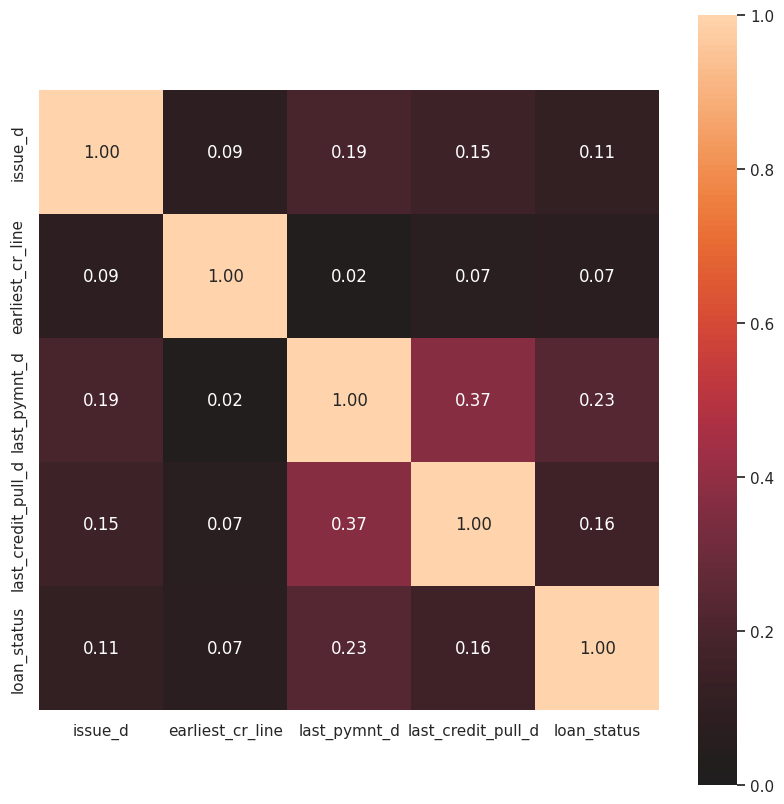

In [47]:
# Define the columns to analyze: date-related features plus loan status
used_cols = date_cols + ["loan_status"]

# Compute associations (correlation and dependence) between date features and loan status
# Save the resulting plot as 'date_correlation.png' with a 10x10 figure size
complete_correlation = associations(
    df2[used_cols],
    filename='date_correlation.jpg',
    figsize=(10,10)
)

In [48]:
# Select the date-related features that show meaningful correlation with loan status
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

# Display the list of selected date features
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d']

In [49]:
# Remove date features that show weak correlation with loan status
unused_cols = ["earliest_cr_line"]

# Drop the specified columns from df2, ignoring errors if the column is missing
pre_df = df2.drop(columns=unused_cols, errors="ignore")

# Display the first few rows of the updated DataFrame
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,NaN,NaN


In [50]:
# Identify categorical columns that are not part of the date-related features
other_cat_cols = cat_features[~cat_features.isin(date_cols)]

# Display the list of non-date categorical feature names
other_cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [51]:
# Display the first 5 rows of the non-date categorical features in the cleaned DataFrame
pre_df.loc[:, other_cat_cols].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f


In [52]:
# Remove non-essential categorical features that are either redundant or low-impact
unused_cols = ["zip_code", "sub_grade"]

# Drop the specified columns from the DataFrame, ignoring errors if they don't exist
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")

# Display the first few rows of the updated DataFrame
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,NaN,NaN


In [53]:
# Calculate the correlation matrix for all numeric features in the DataFrame
correlations = pre_df.select_dtypes(exclude='object').corr()

# Extract and sort the absolute correlation values with loan_status in descending order
correlations["loan_status"].abs().sort_values(ascending=False)

,loan_status
loan_status,1.000000
total_rec_prncp,0.460338
recoveries,0.445422
last_pymnt_amnt,0.384781
total_pymnt_inv,0.358588
total_pymnt,0.355349
collection_recovery_fee,0.300094
int_rate,0.241059
total_rec_late_fee,0.152231
inq_last_6mths,0.116393


In [54]:
# Identify categorical columns that are not part of the date features or previously removed columns
other_cat_cols = cat_features[~cat_features.isin(date_cols + unused_cols)]

# Display the list of remaining categorical features for further processing
other_cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

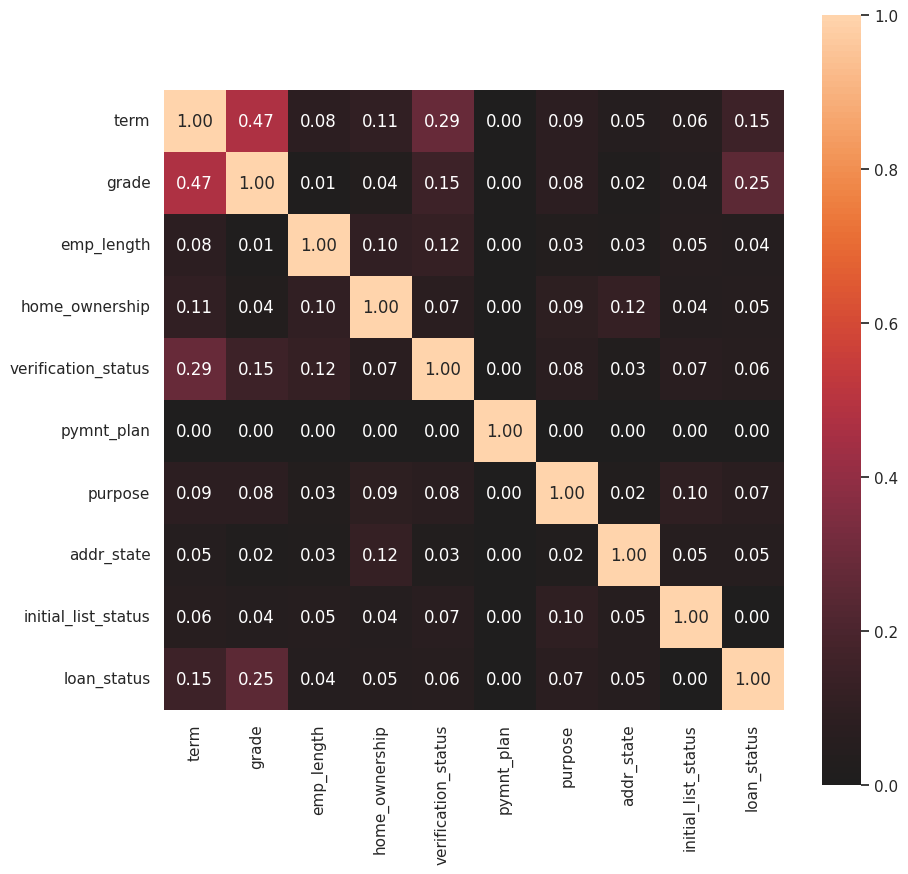

In [55]:
# Correlation between categorical features and loan status
used_cols = other_cat_cols.to_list() + ["loan_status"]
complete_correlation = associations(
    pre_df[used_cols],
    filename='cat_correlation.jpg',
    figsize=(10,10)
)

In [56]:
# Categorical features that we will use
affect_cat_cols = ["grade", "term"]
affect_cat_cols

['grade', 'term']

In [57]:
# Remove features that have little impact
used_cols = ["grade", "term"]
unused_cols = other_cat_cols[~other_cat_cols.isin(used_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,Dec-11,1,...,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,Dec-11,0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,Dec-11,1,...,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,Dec-11,1,...,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,Dec-11,1,...,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,NaN,NaN


In [58]:
# List of columns to be filled with mode values
kolom = ['annual_inc','delinq_2yrs',
         'inq_last_6mths','open_acc','revol_util',
         'total_acc','last_pymnt_d','last_credit_pull_d',
         'tot_cur_bal','total_rev_hi_lim']

# Iterate through each column
for col in kolom:
    # Count modus
    modus = pre_df[col].mode()[0]
    # Fill in missing values with modus
    pre_df[col].fillna(modus, inplace=True)

/tmp/ipython-input-2897074132.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pre_df[col].fillna(modus, inplace=True)


In [59]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   annual_inc               230795 non-null  float64
 8   issue_d                  230795 non-null  object 
 9   loan_status              230795 non-null  int64  
 10  dti                      230795 non-null  float64
 11  delinq_2yrs              230795 non-null  float64
 12  inq_last_6mths           230795 non-null  float64
 13  open_acc                 230795 non-null  float64
 14  revol_bal

# ***Data Modelling***

In [60]:
# Create a copy of the target column "loan_status" as the label
label = pre_df["loan_status"].copy()

# Create a copy of the dataset without the "loan_status" column as the features
features = pre_df.drop("loan_status", axis=1).copy()

# Print the shape (number of rows and columns) of the label
print("Label shape:")
print(label.shape)

# Print the shape (number of rows and columns) of the features
print("Features shape:")
print(features.shape)


Label shape:
(230795,)
Features shape:
(230795, 30)


In [61]:
# Select all numeric features (exclude columns with data type "object")
num_features = features.select_dtypes(exclude="object")

# Select all categorical features (include only columns with data type "object")
cat_features = features.select_dtypes(include="object")


In [62]:
# Normalize numerical features using z-score normalization
# Subtract the mean and divide by the standard deviation for each column
num_features = (num_features - num_features.mean()) / num_features.std()

# Display the normalized numerical features
num_features

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,-1.045905,-1.043424,-1.025130,-0.716859,-1.036168,-0.866103,1.472931,-0.335794,0.078612,-1.626662,...,-0.812658,-0.800159,-0.765957,-0.578913,-0.139146,-0.222400,-0.149837,-0.822146,-0.690145,-0.444179
1,-1.356735,-1.355255,-1.332374,0.340654,-1.459377,-0.757850,-2.000498,-0.335794,3.480063,-1.626662,...,-1.326547,-1.310168,-1.320543,-0.780184,-0.139146,-0.071386,-0.140651,-0.829680,-0.690145,-0.444179
2,-1.369168,-1.367728,-1.344788,0.498595,-1.358750,-1.078064,-0.994312,-0.335794,0.928975,-1.834472,...,-1.115272,-1.099216,-1.083314,-0.700564,-0.139146,-0.222400,-0.149837,-0.752787,-0.690145,-0.444179
3,-0.424244,-0.419761,-0.401331,-0.066786,-0.311488,-0.411438,0.475868,-0.335794,0.078612,-0.171993,...,-0.138548,-0.123979,-0.155655,0.058247,2.788316,-0.222400,-0.149837,-0.795193,-0.690145,-0.444179
5,-1.045905,-1.043424,-1.022026,-1.346331,-1.062495,-0.649596,-0.671081,-0.335794,1.779338,-0.379803,...,-0.836983,-0.821350,-0.765957,-0.687459,-0.139146,-0.222400,-0.149837,-0.823681,-0.690145,-0.444179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,-0.607634,-0.603742,-0.584436,1.022774,-0.811174,-0.621883,-0.530319,5.185496,-0.771750,0.243626,...,-1.218395,-1.202181,-1.332307,-0.744608,-0.139146,1.273040,-0.053887,-0.815471,0.136344,0.995379
466277,0.570412,0.578098,0.588679,-1.346331,0.608204,0.324687,-0.784472,1.044529,-0.771750,1.074865,...,-0.836953,-0.822146,-0.817113,-0.489260,-0.139146,-0.222400,-0.149837,-0.765357,-0.389262,1.015207
466278,-0.424244,-0.419761,-0.401331,1.022774,-0.215091,-0.541342,-0.622857,-0.335794,-0.771750,-0.379803,...,-0.120771,-0.106227,-0.155655,0.145598,-0.139146,-0.222400,-0.149837,-0.049229,-0.618301,-0.539356
466281,1.067741,1.077028,1.088339,1.416480,0.687350,0.108180,0.273848,-0.335794,3.480063,1.490485,...,-0.937959,-0.922172,-1.152029,0.356704,-0.139146,-0.222400,-0.149837,-0.844495,0.876931,0.582943


In [63]:
# Apply One-Hot Encoding to categorical features
# This converts each categorical column into multiple binary (0/1) columns
cat_features = pd.get_dummies(cat_features)

# Display the encoded categorical features
cat_features

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_d_Apr-08,...,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466277,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466278,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# Combine the normalized numeric features and the one-hot encoded categorical features
features_full = pd.concat([num_features, cat_features], axis=1)

# Show the shape (rows, columns) of the combined dataset
features_full.shape

(230795, 326)

In [65]:
# Split the dataset into training and testing sets
# - features_full: the full feature set (independent variables)
# - label: the target variable
# - test_size=0.2 means 20% of the data will be used for testing, 80% for training
# - random_state=42 ensures reproducibility of the split
# - stratify=label makes sure the class distribution is preserved in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_full, label, test_size=0.2, random_state=42, stratify=label
)

# Display the shape of the training features and training labels
X_train.shape, y_train.shape

((184636, 326), (184636,))

# **Algoritma Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model object
lr = LogisticRegression()

# Train (fit) the model using the training features and labels
lr.fit(X_train, y_train)

LogisticRegression()

Training Accuracy: 0.9911230745900041

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     36845
           1       0.99      1.00      0.99    147791

    accuracy                           0.99    184636
   macro avg       0.99      0.98      0.99    184636
weighted avg       0.99      0.99      0.99    184636

Test Accuracy: 0.990402738360883

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      9211
           1       0.99      1.00      0.99     36948

    accuracy                           0.99     46159
   macro avg       0.99      0.98      0.98     46159
weighted avg       0.99      0.99      0.99     46159



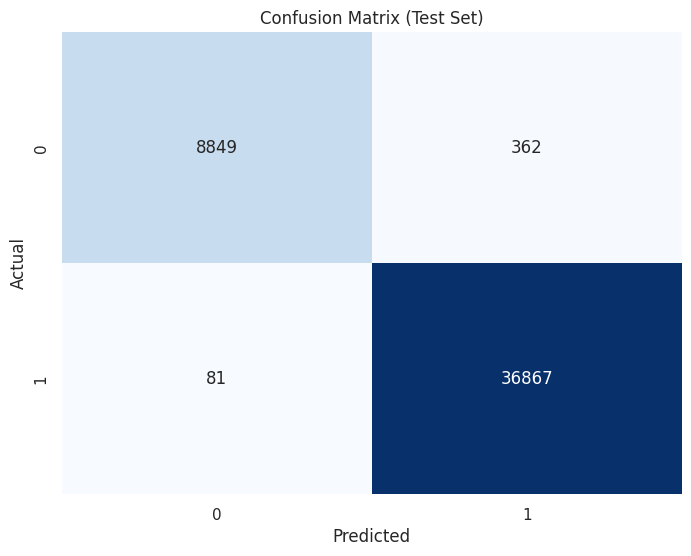

In [67]:
# Train predictions
y_train_pred = lr.predict(X_train)

# Save the trained model using joblib (better to use .pkl instead of .h5 for sklearn models)
joblib.dump(lr, "logistic_regression_model.h5")

# --- Evaluation on Training Set ---
print("Training Accuracy:", lr.score(X_train, y_train))
print("\nClassification Report (Training):")
print(classification_report(y_true=y_train, y_pred=y_train_pred))

# --- Evaluation on Test Set ---
y_test_pred = lr.predict(X_test)
print("Test Accuracy:", lr.score(X_test, y_test))
print("\nClassification Report (Test):")
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# --- Confusion Matrix (Test Set) ---
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Algoritma LightGBMClassifier**

In [68]:
# Create and Train LightGBM Model
from lightgbm import LGBMClassifier # Import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1, random_state=42)  # verbose=-1 to suppress output
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

Training Accuracy: 0.9974544509196474

Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     36845
           1       1.00      1.00      1.00    147791

    accuracy                           1.00    184636
   macro avg       1.00      0.99      1.00    184636
weighted avg       1.00      1.00      1.00    184636

Test Accuracy: 0.9953855152841266

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9211
           1       1.00      1.00      1.00     36948

    accuracy                           1.00     46159
   macro avg       1.00      0.99      0.99     46159
weighted avg       1.00      1.00      1.00     46159



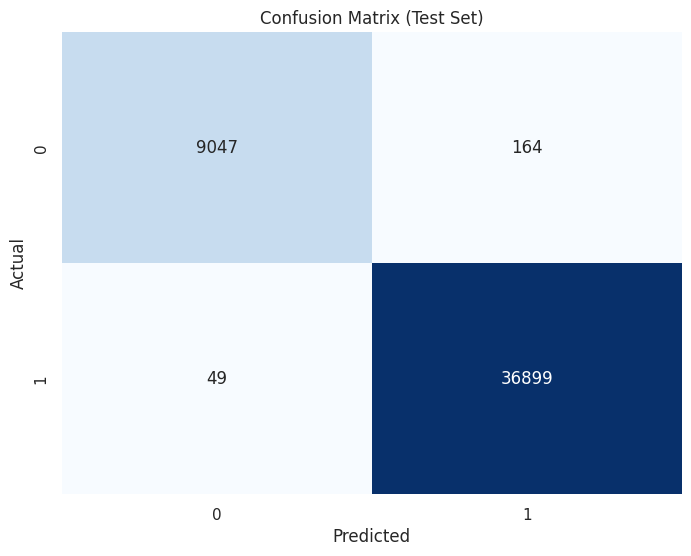

In [69]:
# Train predictions
y_train_pred = lgbm.predict(X_train)

# Save the trained model using joblib (better to use .pkl instead of .h5 for sklearn models)
joblib.dump(lgbm, "lightgbm_model.h5")

# Evaluation on Training Set
print("Training Accuracy:", lgbm.score(X_train, y_train))
print("\nClassification Report (Training):")
print(classification_report(y_true=y_train, y_pred=y_train_pred))

# Evaluation on Test Set
y_test_pred = lgbm.predict(X_test)
print("Test Accuracy:", lgbm.score(X_test, y_test))
print("\nClassification Report (Test):")
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# Confusion Matrix (Test Set)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
# Logistic Regression Evaluation
y_pred_lr = lr.predict(X_test)  # Predict classes
print("Logistic Regression Report:")
# Convert classification report to DataFrame
report_lr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True))
display(report_lr)

# LightGBM Evaluation
y_pred_lgbm = lgbm.predict(X_test)  # Predict classes
print("\nLightGBM Report:")
# Convert classification report to DataFrame
report_lgbm = pd.DataFrame(classification_report(y_test, y_pred_lgbm, output_dict=True))
display(report_lgbm)

Logistic Regression Report:


,0,1,accuracy,macro avg,weighted avg
precision,0.990929,0.990276,0.990403,0.990603,0.990407
recall,0.960699,0.997808,0.990403,0.979253,0.990403
f1-score,0.975580,0.994028,0.990403,0.984804,0.990347
support,9211.000000,36948.000000,0.990403,46159.000000,46159.000000



LightGBM Report:


,0,1,accuracy,macro avg,weighted avg
precision,0.994613,0.995575,0.995386,0.995094,0.995383
recall,0.982195,0.998674,0.995386,0.990435,0.995386
f1-score,0.988365,0.997122,0.995386,0.992744,0.995375
support,9211.000000,36948.000000,0.995386,46159.000000,46159.000000


# **Kesimpulan**

Berdasarkan hasil pengujian terhadap dua model yang digunakan, yaitu LightGBM dan Logistic Regression, dapat disimpulkan bahwa keduanya memiliki kinerja yang sangat baik dengan tingkat akurasi, presisi, recall, serta f1-score yang tinggi pada data pelatihan maupun data pengujian.

Namun, apabila dibandingkan secara lebih rinci, LightGBM menunjukkan performa yang lebih unggul dibandingkan Logistic Regression, khususnya pada hasil pengujian dengan akurasi yang lebih tinggi dan tingkat kesalahan prediksi yang lebih rendah. Hal ini menunjukkan bahwa LightGBM lebih efektif dalam mengklasifikasikan data, terutama dalam konteks proses penerimaan maupun penolakan peminjaman.

Dengan demikian, penggunaan LightGBM dinilai lebih sesuai untuk mendukung pengambilan keputusan, karena mampu meminimalkan risiko kesalahan yang dapat berdampak pada perusahaan.